In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'BTC-USD'
scale = 1
range_list = [5, 10, 15, 20, 25, 30]
range_list = [i*scale for i in range_list]
period = '1y'
interval = '1d'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=True)

[*********************100%***********************]  1 of 1 completed


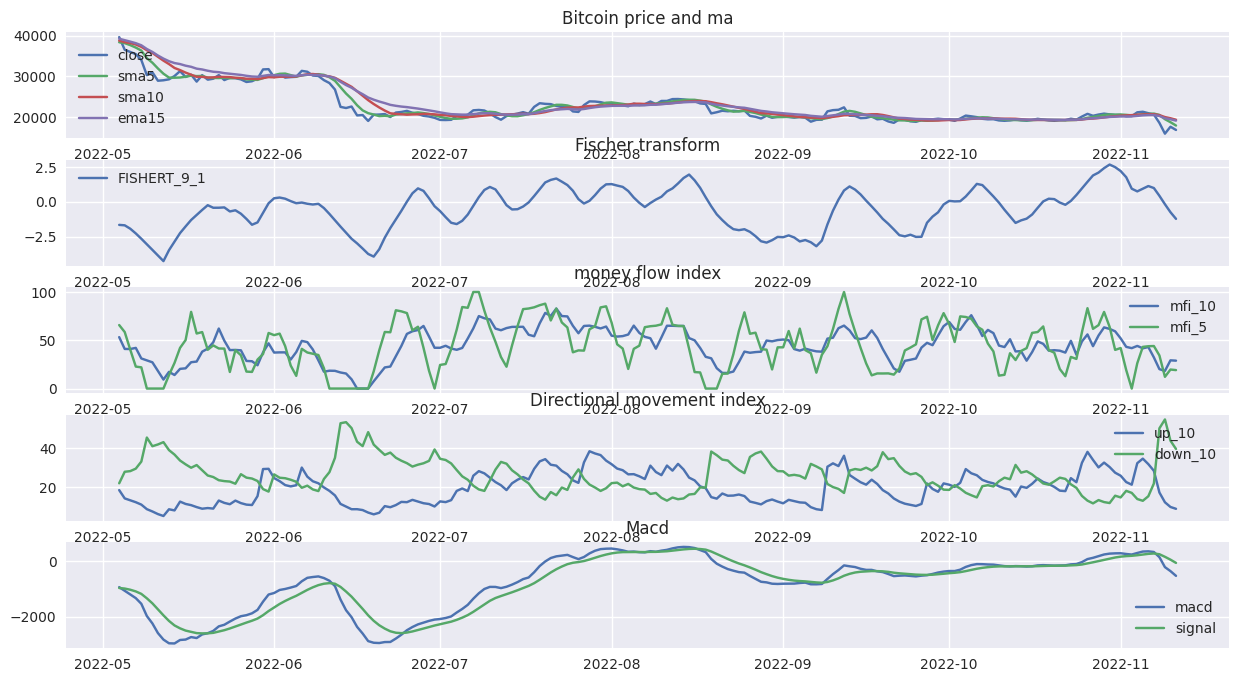

In [2]:
df = data.df.copy()
bt.bt_plot_indicators(df, "Bitcoin")

In [44]:
pure_df = data.get_symbol_df('BTC-USD', pure=True)
pure_df.head()

,open,high,low,close,adj_close,volume
Datetime,,,,,,
2021-11-11,64978.8906,65579.0156,64180.4883,64949.9609,64949.9609,35880633236
2021-11-12,64863.9805,65460.8164,62333.9141,64155.9414,64155.9414,36084893887
2021-11-13,64158.1211,64915.6758,63303.7344,64469.5273,64469.5273,30474228777
2021-11-14,64455.3711,65495.1797,63647.8086,65466.8398,65466.8398,25122092191
2021-11-15,65521.2891,66281.5703,63548.1445,63557.8711,63557.8711,30558763548


In [41]:
import pandas_ta as ta

In [ ]:
def create_ind_with_c_stoch(dft: pd.DataFrame(), func_ta) -> None:
        dft['stoch_k'], dft['stoch_d'] = func_ta(dft['close'], timeperiod=14, fastk_period=3, fastd_period=3, fastd_matype=0)

In [45]:
sm = ta.stochrsi(pure_df.close)
sm.head()
for i in range_list:
    mk = ta.sma(pure_df.close, length=i)
pure_df = pd.concat([pure_df, sm, mk], axis=1)
pure_df.tail()

,open,high,low,close,adj_close,volume
Datetime,,,,,,
2022-11-07,20924.6211,21053.2461,20489.9727,20602.8164,20602.8164,53510852236
2022-11-08,20600.6719,20664.6074,17603.5449,18541.2715,18541.2715,118992465607
2022-11-09,18543.7617,18590.4590,15682.6924,15880.7803,15880.7803,102905151606
2022-11-10,15883.1582,18054.3125,15834.0186,17586.7715,17586.7715,83202283721
2022-11-11,17613.3281,17646.1914,16565.8594,16795.8516,16795.8516,56441675776


In [46]:

for i in range_list:
    pure_df.ta.ema(length=i, append=True) 

In [51]:
bbands = pure_df.ta.bbands(length=10).iloc[:, :3]
bbands

,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0
Datetime,,,
2021-11-11,NaN,NaN,NaN
2021-11-12,NaN,NaN,NaN
2021-11-13,NaN,NaN,NaN
2021-11-14,NaN,NaN,NaN
2021-11-15,NaN,NaN,NaN
...,...,...,...
2022-11-07,19974.1151,20676.3844,21378.6536
2022-11-08,18999.1252,20448.6639,21898.2025
2022-11-09,16886.2617,19973.1815,23060.1014


In [49]:
pure_df.head()

,open,high,low,close,adj_close,volume,EMA_5,EMA_10,EMA_15,EMA_20,EMA_25,EMA_30,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0
Datetime,,,,,,,,,,,,,,,,,
2021-11-11,64978.8906,65579.0156,64180.4883,64949.9609,64949.9609,35880633236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-12,64863.9805,65460.8164,62333.9141,64155.9414,64155.9414,36084893887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-13,64158.1211,64915.6758,63303.7344,64469.5273,64469.5273,30474228777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-14,64455.3711,65495.1797,63647.8086,65466.8398,65466.8398,25122092191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-15,65521.2891,66281.5703,63548.1445,63557.8711,63557.8711,30558763548,64520.0281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
